<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Decision Making with Uncertainty

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a summary of **Decision Making with Uncertainty** including essential concepts:

* establishing model realizations and decision scenarios

* calculating expected profit over decision scenarios and selecting decision scenario that maximizes expected profit

* designing loss functions

* calculating the estimate that minimize the expected loss

**YouTube Lecture**: check out my lectures on:

* [Decision Making in the Presence of Uncertainty](https://youtu.be/Yu9jDlqBrJE?si=3SURJ97ElUrky_5w)

For convenience here's a summary of the salient points.

#### Motivation for Decision Making with Uncertainty 

We have built uncertainty models, now we need to make decisions in the presence of uncertainty.

<figure style="text-align: center;">
  <img src="_static/decision/uncertainty.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> Multiple reservoir realizations to represent uncertainty, but we must make a single choice, where to put the well.
</figcaption>
</figure>

#### Building Uncertainty Models

How did we calculate our uncertainty model(s)? Some examples,

* **Bayesian Updating** - prior plus likelihood to calculate the posterior, for example, probability that a coin is fair, uncertainty in reservoir OIP

* **Bootstrap + Monte Carlo Simulation and Transfer Function** - uncertainty the mean porosity by bootstrap, then Monte Carlo simulation for uncertainty in oil-in-place

* **Kriging** - kriging estimate and variance with Gaussian assumption for uncertainty in mineral grade at a location

* **Simulation and Transfer Function** - reservoir features realizations applied to flow simulation to calculate pre-drill production uncertainty at a new well

One way or another, we have calculated a reasonable uncertainty model, for example,

* connected volume of water or hydrocarbon to a location

* mineral or hydrocarbon resource in place 

* recover factor mineral or hydrocarbon extraction

<figure style="text-align: center;">
  <img src="_static/decision/lead.png" style="display: block; margin: 0 auto; width: 900%;">
  <figcaption style="text-align: center;"> Two realizations of soil lead concentration near a closed lead smelter Superfund site in West Dallas, Texas (Pyrcz, 2000). Units are PPM.
</figcaption>
</figure>

and now we must make a decision with that uncertainty model, for example, 

* number and locations of wells

* time and volume injected for water of chemical flood, pump and treat remediation

* dig limits and mine plan


#### Aspects of Subsurface Decision Making

Decision making for subsurface development is a massive, integrated challenge! For an example consider the various aspects related to well site selection, 

* **Integer programing** problem, output must be an integer or discrete choice and not continuous 

* **Optimization** including single choice and joint choice optimization with constraints between each choice

* **Experimental design** to explore a potentially vast uncertainty model space and then statistical / machine learning models to develop response surface, surrrogate models to support larger Monte Carlo simulation studies

Let's back up and consider the problem from a data science perspect, our well site selection problem includes,

* **High dimensionality** - complicated by large number of geological and engineering parameters in space and time

* **Interactions** - complicated constraints and feedbacks between the geological and engineeirng parameters and our decisions, i.e., it is not appropriate to make $L$-optimum choices, a set of choices that are optimum for each model, instead we must make one globally optimum choice. 

<figure style="text-align: center;">
  <img src="_static/decision/global.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Global optimum vs. L suboptimum (Pyrcz and Deutsch, 2014).
</figcaption>
</figure>

#### Expected Profit Workflow

These are the steps in the expected profit workflow for optimum decision making in the presence of uncertainty,

1. Calculate the uncertainty model, $\ell = 1,\ldots,L$ subsurface realizations                

2. Establish $s = 1,\dots,S$ development scenarios

3. Establish $P$ profit metric

4. Calculate profit, $P$, over all $L$ and $S$
   
5. Calculate the expected profit for each development scenario, $E\{P(S)\}$

6. Select the $𝑠$ development scenario that maximizes expected profit.

Now we walk through each of these steps and provide more details.


#### The Uncertainty Model

Calculate the uncertainty model, $\ell = 1,\ldots,L$, subsurface models. This includes,

* **Scenarios** - change the model inputs, and assumptions to capture uncertainty in the modeling decisions

* **Realizations** - change the random number seed to capture spatial uncertainty

* **Multivariate** - include all needed features, and their relations

The **uncertainty model** is represented by multiple models, scenarios and realizations, of the subsurface. For brevity, we just use the term subsurface realizations going forward.

<figure style="text-align: center;">
  <img src="_static/decision/realizations.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> \(\ell=1,…,6\) subsurface models, realizations and scenarios of the subsurface.
</figcaption>
</figure>


#### The Decision Scenarios

**Decision Scenario** - discrete choices for developing the spatial, subsurface resource.

* **complete** - each decision scenario includes all details needed to simulate extraction, for example, well locations, completion types, dig limits, mining block sequence

* **mutually exclusive** - you can only make one choice, it is not possible to select 2 or more choices

* **exhaustive** - all possible choices are included, there is no other choices available

For an example of decision scenarios, consider 3 potential well locations with drainage radius,

<figure style="text-align: center;">
  <img src="_static/decision/scenarios.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> \(s=1,…,3\) development scenarios.
</figcaption>
</figure>


#### The Profit Metric

The profit metric is,

* a **transfer function** to map from spatial realizations, $\ell$, and decision scenario, $s$, to a value metric, $P(\ell,s)$

* is in the **units** of the thing are we trying to maximize. For example, net present value, tonnage contaminant removed from soil, or volume of resource recovered

<figure style="text-align: center;">
  <img src="_static/decision/profit.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Profit for \(𝑙=5\), realization, \(𝑠=2\) decision scenario.
</figcaption>
</figure>

We calculate profit over all $L$ subsurface realizations, and $S$ decision scenarios. If computational feasible, we work with the,

* **full combinatorial** of $L$ subsurface realizations and $S$ decision scenarios, $P(\ell = 1,\ldots,L,s=1,\ldots,S)$

<figure style="text-align: center;">
  <img src="_static/decision/profits.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Profit calculated over all subsurface realizations and development scenarios.
</figcaption>
</figure>


#### Expected Profit

To integrate the uncertainty model, we calculate expected profit $E\{P(S)\}$

* expected profit is a probability, $\lambda_l$, weighted average of profit over subsurface uncertainty 

$$
\mathbb{E}\{P(s = 2)\} = \frac{1}{\sum_{\ell=1}^{L} \lambda_l} \sum_{\ell=1}^{L} \lambda_l \cdot P(\ell, s = 2)
$$

if all models are equiprobable, this simplifies to,

$$
\lambda_l = \frac{1}{L}, \quad \ell = 1, \dots, L
$$


#### Maximize Expected Profit

Now we maximize the expected profit $E\{P(S)\}$,

1. calculate the expected profit for all decision scenarios, $s = 1,\ldots, S$

* select the development scenario, $s$, that maximizes expected profit over the subsurface realizations, $L$, represented as,

$$
s=𝒂𝒓𝒈𝒎𝒂𝒙(E\{P(S,L)\})
$$

<figure style="text-align: center;">
  <img src="_static/decision/expectedprofits.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Expected profit calculated over all \(s = 1,\ldots,3\) development scenarios and \(\ell = 1, \ldots, L\) subsurface realizations and select the development scenario with highest expected profit, \(s=1\) selected.
</figcaption>
</figure>

This is the fundamental workflow for making an optimum decision in the presence of uncertainty. 

Below we demonstrate this approach to select a single estimate from an uncertainty distribution. But, let's first talk about uncertainty.

How do we make optimum estimates in the presence of uncertainty?

* we cannot provide an uncertainty distribution to operations for decision making.

* we must provide a single estimate. We must choose a single estimate in the presence of uncertainty

Let's think about making this single estimate, we could just choose the average, expectation assuming equal probability for each outcome.

* The **expectation estimate** assumes the cost of under- and over-estimation is symmetric and squared, i.e., the squared loss L2 norm

* **Risk Adverse** – cost of overestimation > cost of underestimation

* **Risk Seeking** – cost of overestimation < cost of underestimation

Let’s formalize this with the concept of **loss functions**.


#### Loss Functions

To make a decision in the presence of uncertainty we need to quantify the loss function,

* loss due to over- and underestimation of the true value

* no loss if the estimate is correct, i.e., if Estimate – Truth = 0

* Note: estimating with the mean minimizes the quadratic loss function

Here's the L2 loss, symmetric and increasing with the square away from 0, perfectly accurate prediction, 

<figure style="text-align: center;">
  <img src="_static/decision/l2loss.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Simple loss function, the cost of estimation error represented with a symmetric quadratic function. This is L2 loss.
</figcaption>
</figure>

For a more complicated example, overestimation is more costly than underestimation and at some threshold underestimation any further has no more cost,

<figure style="text-align: center;">
  <img src="_static/decision/complexloss.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Complicated loss function, the cost of estimation error with asymmetry and thresholds.
</figcaption>
</figure>

To further illustrate loss functions, consider the loss function to support the decision to carry an umbrella given uncertainty in the weather, rain or no rain from Professor Clayton Deutsch's geostatistics course.

* **Overestimation** - you estimate rain, but no rain happens

* **Underestimation** = you estimate no rain, but rain happens

Should you carry an umbrella? The loss function depend on where you are going?

<figure style="text-align: center;">
  <img src="_static/decision/zoo.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Loss functions for estimating rain for going to the zoo, an interview and the swimming pool.
</figcaption>
</figure>

#### Decision Making with Loss Functions

This is the workflow for decision making in the presence of uncertainty,

1. quantify cost of over- and underestimation in a loss function

2. apply loss function to the random variable of interest for a range of estimates

3. calculate the expected loss for each estimate

$$
E\{Loss(z^{*})\} = \int_{-\infty}^{\infty} \text{Loss}(z - z^*) \cdot f_z(z) \, dz
$$

4. make the decision that minimizes loss	

<figure style="text-align: center;">
  <img src="_static/decision/nutsbolts.png" style="display: block; margin: 0 auto; width: 40%;">
  <figcaption style="text-align: center;"> Illustration of expect loss calculated for three estimates, given the loss function (above) and the distribution of uncertainty for the estimate, \(z^{*}\) (below).
</figcaption>
</figure>

To understand the change in expected profit over different estimates, let's put the flipped loss on the uncertainty distribution. 

<figure style="text-align: center;">
  <img src="_static/decision/threeestimates.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Uncertainty PDF and loss for three estimate cases shown in the figure above.
</figcaption>
</figure>

Now we can explain the results,

* the estimate (black) is the lowest because the mode of the uncertainty distribution (highest probability) includes the lowest loss portions of the loss function.

* the estimate (red) is the highest because the cost of over estimation is more costly and the entire uncertainty distribution is in the over estimated portion of the loss function

* the estimate (blue) is quite low, but the cost of underestimation levels off, so the loss is not that high

Let's actually demonstrate the calculation of expected loss for a discrete case, we turn the uncertainty model into a normalized histogram with probability to be in each bin,

$$
\mathbb{E}\{\text{Loss}(z^*)\} = \int_{-\infty}^{\infty} L(z - z^*) \cdot f_z(z) \, dz = \sum L(z - z^*) \cdot P(z)
$$

Now we can calculate the expected loss for an estimate of 100 MMbbl as,

<figure style="text-align: center;">
  <img src="_static/decision/discrete1.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Expected loss for an estimate of 100 MMbbl.
</figcaption>
</figure>

and the expected loss for an estimate of 400 MMbbl as,

<figure style="text-align: center;">
  <img src="_static/decision/discrete2.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Expected loss for an estimate of 400 MMbbl.
</figcaption>
</figure>

and the expected loss for an estimate of 700 MMbbl as,

<figure style="text-align: center;">
  <img src="_static/decision/discrete3.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Expected loss for an estimate of 700 MMbbl.
</figcaption>
</figure>

To demonstrate this, I built out an interactive dashboard for decision making in the presence of uncertainty.

* this will not render in the book, so in the future I will add static examples for the book.
  
* here is the [interactive dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Decision_Making.ipynb).

<figure style="text-align: center;">
  <img src="_static/decision/interactive_decision.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python dashboard for decision making in the presence of uncertainty.
</figcaption>
</figure>

  
#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import os                                                     # set working directory, run executables
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import Rbf                             # countours that extrapolate
from scipy import stats                                       # summary statistics
from scipy.signal import convolve2d                           # convolution
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter
import math                                                   # trig etc.
import random
cmap = plt.cm.inferno

plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
seed = 13                                                     # set ramdon number seed
cmap = plt.cm.inferno

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs. 

#### Declare Functions

These are some conveneince functions for more readable code in our workflows. 

In [3]:
def add_grid2():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

def add_grid(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

def generate_gaussian_fields(L, ny, nx):     # Generate L random 2D Gaussian fields (white noise).
    return np.random.randn(L, ny, nx)

def circular_kernel(radius):                 # Create a 2D circular kernel of a given radius.
    size = int(2 * radius + 1)
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel = np.zeros((size, size))
    kernel[mask] = 1
    kernel /= np.sum(kernel)                 # Normalize
    return kernel
 
def convolve_fields(fields, kernel):         # Convolve each 2D field with the given kernel.
    L, ny, nx = fields.shape
    convolved_fields = np.empty_like(fields)
    for i in range(L):
        convolved_fields[i] = convolve2d(fields[i], kernel, mode='same', boundary='wrap')
    return convolved_fields

def generate_sample_locations(xmin, xmax, ymin, ymax, nx, ny):  # array of [sample_index, y, x] for a grid with samples
    dx = (xmax - xmin) / nx
    dy = (ymax - ymin) / ny
    
    x = np.linspace(xmin + dx/2, xmax - dx/2, nx)
    y = np.linspace(ymin + dy/2, ymax - dy/2, ny)
    
    xv, yv = np.meshgrid(x, y)
    
    x_flat = xv.ravel()
    y_flat = yv.ravel()

    samples = np.stack([y_flat, x_flat], axis=1)
    return samples, xv, yv

def average_within_radius(grid, x, y, p, domain_size=1000): #    Compute average of cells within p meters from point (x, y), flipped Y-axis
    ny, nx = grid.shape
    dx = domain_size / nx
    dy = domain_size / ny

    # Convert (x, y) to fractional grid indices
    ix_center = x / dx
    iy_center = y / dy

    # Flip Y-axis: adjust index range accordingly
    j_center = ny - 1 - iy_center  # flipped row index

    # Bounding box in index space
    i_min = int(max(0, np.floor(ix_center - p / dx)))
    i_max = int(min(nx - 1, np.ceil(ix_center + p / dx)))
    j_min = int(max(0, np.floor(j_center - p / dy)))
    j_max = int(min(ny - 1, np.ceil(j_center + p / dy)))

    # Index meshgrid
    j_indices, i_indices = np.meshgrid(np.arange(j_min, j_max + 1),
                                       np.arange(i_min, i_max + 1),
                                       indexing='ij')

    # Convert indices to physical coordinates
    x_coords = (i_indices + 0.5) * dx
    y_coords = (ny - j_indices - 0.5) * dy  # Flip Y-axis

    # Distance from target point
    distances = np.sqrt((x_coords - x)**2 + (y_coords - y)**2)

    # Mask and average
    mask = distances <= p
    values_within_radius = grid[j_indices[mask], i_indices[mask]]

    if values_within_radius.size == 0:
        return np.nan
    else:
        return np.mean(values_within_radius)

#### Maximizing the Expected Profit Example

Here is a practical demonstration of decision making in the presence of uncertainty with expected profit over multiple realizations, $\ell = 1,\ldots,L$ and decision scenarios, $s = 1,\ldots,S$, 

1. calculate $L$ realizations to characterize uncertianty.

2. specify $S$ possible choices.

3. specify the profit function, $P(\ell,s)$.

4. calculate the expected profit over all possible choices, $E{

$$
\mathbb{E}\{P(s)\} = \frac{1}{\sum_{\ell=1}^{L} \lambda_l} \sum_{\ell=1}^{L} \lambda_l \cdot P(\ell, s)
$$

5. select the $s$ decision scenario that maximizes the profit.

First let's make the realizations for our uncertainty model. For efficiency we use a convolution model.

* stochastic trend (deterministic given a set random number seed) + stochastic residual

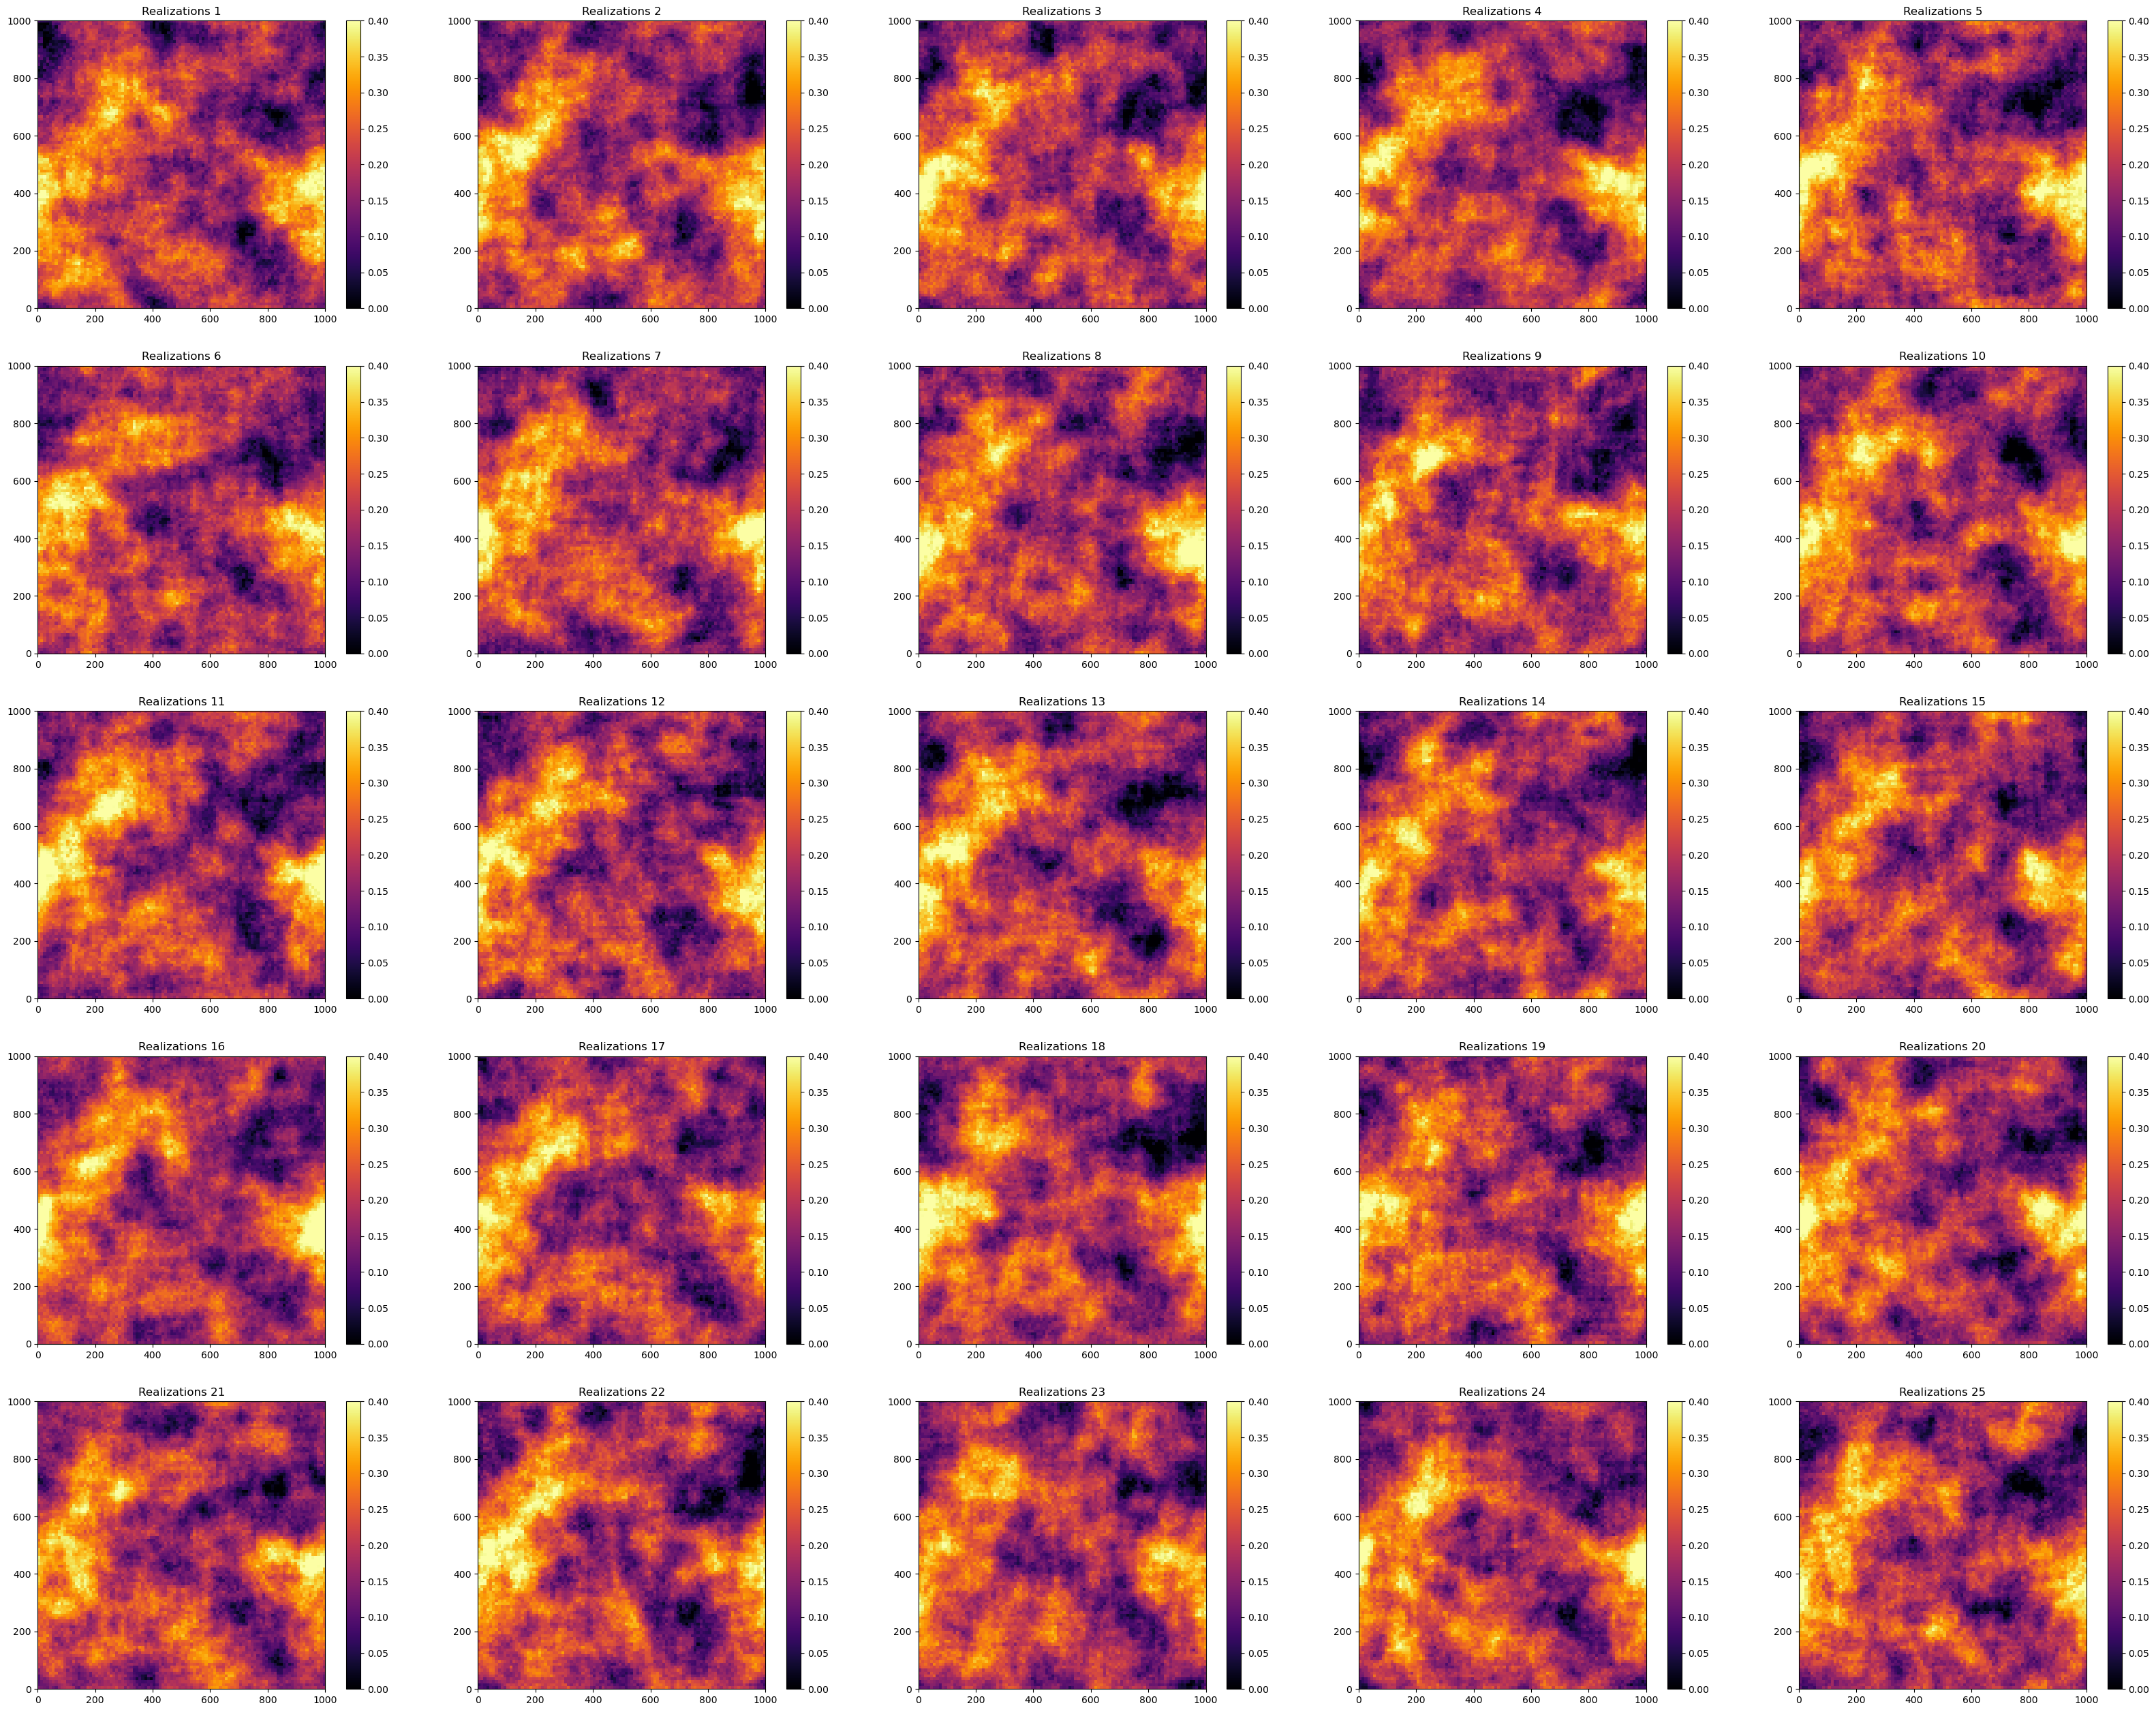

In [4]:
np.random.seed(seed = seed)
xmin = 0.0; xmax = 1000.0; ymin = 0.0; ymax = 1000.0; vmin = 0.0; vmax = 0.4; nw = 5
S = nw * nw
L = 25; ny, nx = 100, 100; r = 5; r_trend = 15 # number of realizations, model size, and kernel radius
smoothed_fields_trend = np.zeros((L,ny,nx))

trend = generate_gaussian_fields(1, ny, nx)
kernel_trend = circular_kernel(r_trend) 
trend = convolve_fields(trend, kernel_trend) 

trend = GSLIB.affine(trend.flatten(),0.2,0.07).reshape(ny,nx)

fields = generate_gaussian_fields(L, ny, nx) # generate and convolve fields
kernel = circular_kernel(r)                  # make kernel to impose spatial continuity by convolution
smoothed_fields = convolve_fields(fields, kernel) 

fields = generate_gaussian_fields(L, ny, nx) # generate and convolve fields
kernel = circular_kernel(r)                  # make kernel to impose spatial continuity by convolution
smoothed_fields = convolve_fields(fields, kernel) 

for l in range(0,L):
    smoothed_fields[l] = GSLIB.affine(smoothed_fields[l].flatten(),0.0,0.04).reshape(ny,nx)
    smoothed_fields_trend[l] = smoothed_fields[l] + trend

for i in range(1,L+1):
    plt.subplot(5, 5, i)
    plt.title("Realizations " + str(i))
    plt.imshow(smoothed_fields_trend[i-1], cmap=cmap,extent = [xmin,xmax,ymin,ymax],vmin = vmin, vmax = vmax)
    plt.colorbar()
    plt.tight_layout()

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=5.1, wspace=0.05, hspace=0.2); plt.show()   

Now we can specify the decision scenarios 

* a 5 x 5 grid of potential well locations

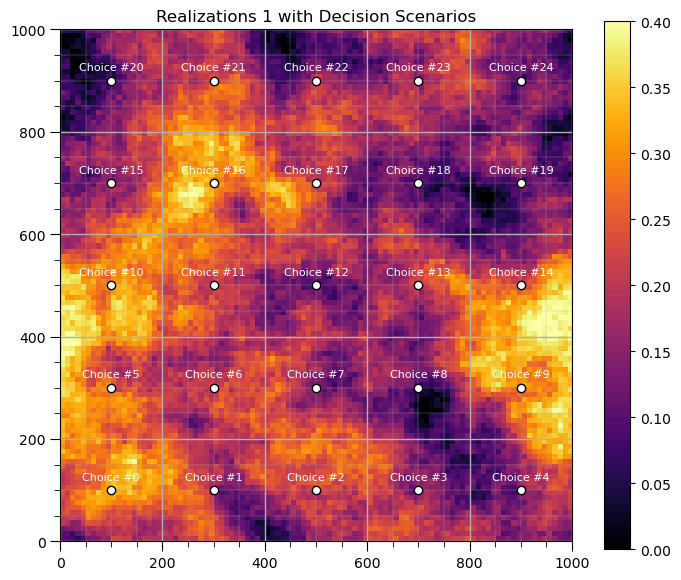

In [5]:
scenarios, xv, yv = generate_sample_locations(xmin, xmax, ymin, ymax, nw, nw)

plt.subplot(111)
plt.title("Realizations 1 with Decision Scenarios")
im = plt.imshow(smoothed_fields_trend[0], cmap=cmap,extent = [xmin,xmax,ymin,ymax],vmin = vmin, vmax = vmax)
plt.scatter(scenarios[:,1],scenarios[:,0],color='white',edgecolor = 'black')
for s in range(0,S):
    plt.annotate('Choice #' + str(s),[scenarios[s,1],scenarios[s,0]+20],color= 'white',ha = 'center',fontsize=8)
plt.colorbar(im); plt.tight_layout(); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.05, hspace=0.2); plt.show()  

Now we specfy a simple profit calculation. Value in US$ for hydrocarbon extracted from the well assuming,

* all rock with in 50 meters is drained perfectly

* the porosity is completely full of hydrocarbon, i.e., oil saturation is 100%

* 10 m uniform reservoir thickness

* 6.28981 barrels / m^3

* $70.0 / barrel

Let's run this on only the first realization and add the profit for just this realization on the map.

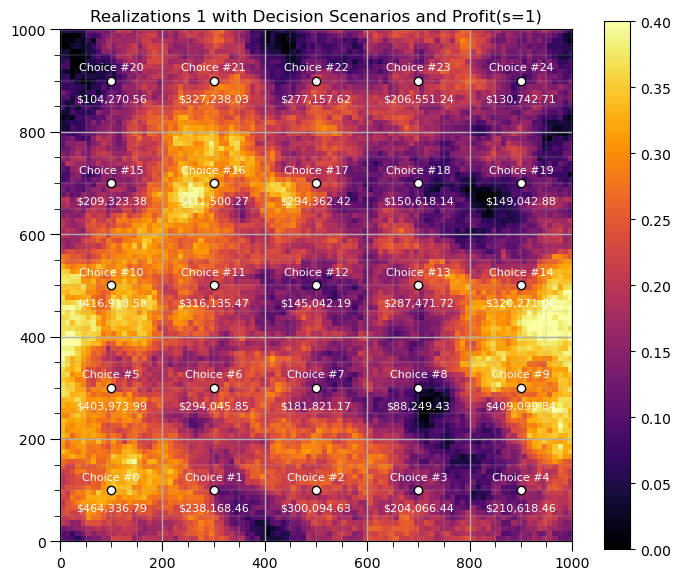

In [6]:
radius = 10.0
profit_onereal = np.zeros((S))
for s in range(0,S):
    profit_onereal[s] = average_within_radius(smoothed_fields_trend[0], x=scenarios[s,1],y=scenarios[s,0], p=radius, domain_size=1000) 
    profit_onereal[s] = profit_onereal[s] * np.pi * radius * radius * 10.0 * 6.28981 * 70.0

plt.subplot(111)
plt.title("Realizations 1 with Decision Scenarios and Profit(s=1)")
im = plt.imshow(smoothed_fields_trend[0], cmap=cmap,extent = [xmin,xmax,ymin,ymax],vmin = vmin, vmax = vmax)
plt.scatter(scenarios[:,1],scenarios[:,0],color='white',edgecolor = 'black')
for s in range(0,S):
    plt.annotate('Choice #' + str(s),[scenarios[s,1],scenarios[s,0]+20],color= 'white',ha = 'center',fontsize=8)
    label = f"${np.round(profit_onereal[s],2):,.2f}"
    plt.annotate(str(label),[scenarios[s,1],scenarios[s,0]-40],color= 'white',ha = 'center',fontsize=8)
plt.colorbar(im); plt.tight_layout(); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.05, hspace=0.2); plt.show()  

Now we calculate the expected profit over all realizations. 

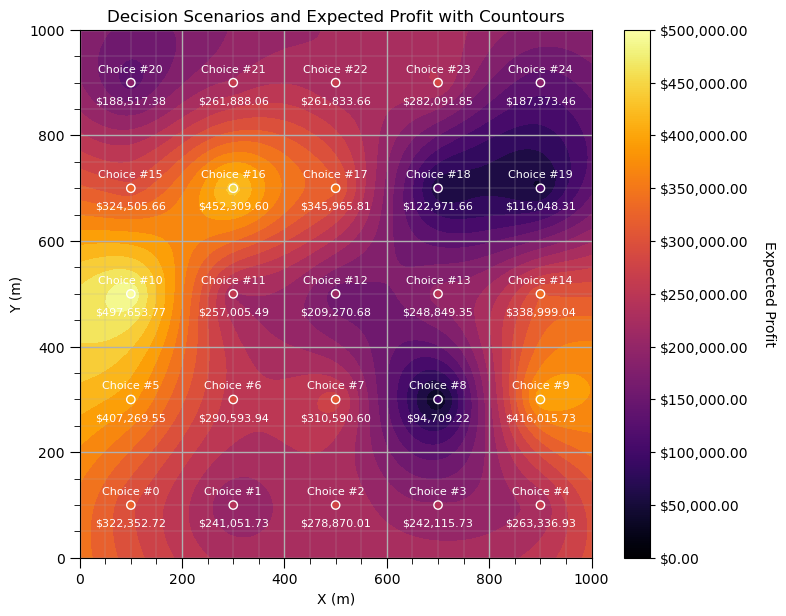

In [7]:
profit = np.zeros((L,S))
for l in range(0,L):
    for s in range(0,S):
        profit[l,s] = average_within_radius(smoothed_fields_trend[l], x=scenarios[s,1],y=scenarios[s,0], p=radius, domain_size=1000) 
        profit[l,s] = profit[l,s] * np.pi * radius * radius * 10.0 * 6.28981 * 70.0

expected_profit = np.average(profit,axis = 0)

plt.subplot(111)
plt.title("Decision Scenarios and Expected Profit with Countours")
sc = plt.scatter(scenarios[:,1],scenarios[:,0],c=expected_profit,edgecolor = 'white',cmap=cmap,vmin = 0, vmax = 500000,zorder=100)
for s in range(0,S):
    plt.annotate('Choice #' + str(s),[scenarios[s,1],scenarios[s,0]+20],color= 'white',ha = 'center',fontsize=8,zorder=100)
    label = f"${np.round(expected_profit[s],2):,.2f}"
    plt.annotate(str(label),[scenarios[s,1],scenarios[s,0]-40],color= 'white',ha = 'center',fontsize=8,zorder=100)
cbar = plt.colorbar(sc,orientation="vertical", ticks=np.linspace(0, 500000, 11)); plt.tight_layout()
formatter = FuncFormatter(lambda x, pos: f"${x:,.2f}")
cbar.set_label('Expected Profit', rotation=270, labelpad=20)
cbar.set_ticks(cbar.get_ticks())  # Ensure ticks are set
cbar.ax.yaxis.set_major_formatter(formatter)

x_grid = np.linspace(xmin, xmax, 100)  # Higher resolution grid between xmin and xmax
y_grid = np.linspace(ymin, ymax, 100)  # Higher resolution grid between ymin and ymax
X, Y = np.meshgrid(x_grid, y_grid)

rbf = Rbf(xv.flatten(), yv.flatten(), expected_profit, function='linear')  # or 'multiquadric', 'thin_plate', etc.
Z = rbf(X, Y)  # works on full grid

plt.contourf(X, Y, Z, levels=20, cmap=cmap,zorder=0)

#contour = plt.contour(X, Y, Z_smooth, 10, cmap=cmap, alpha=0.7)
plt.xlabel('X (m)'); plt.ylabel('Y (m)')
plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax]); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.05, hspace=0.2); plt.show()  

I have to admit, this turned out very cool. We can now produce a map of expected profit for each well location.

* but ultimately we need to identify the next choice, so here is.

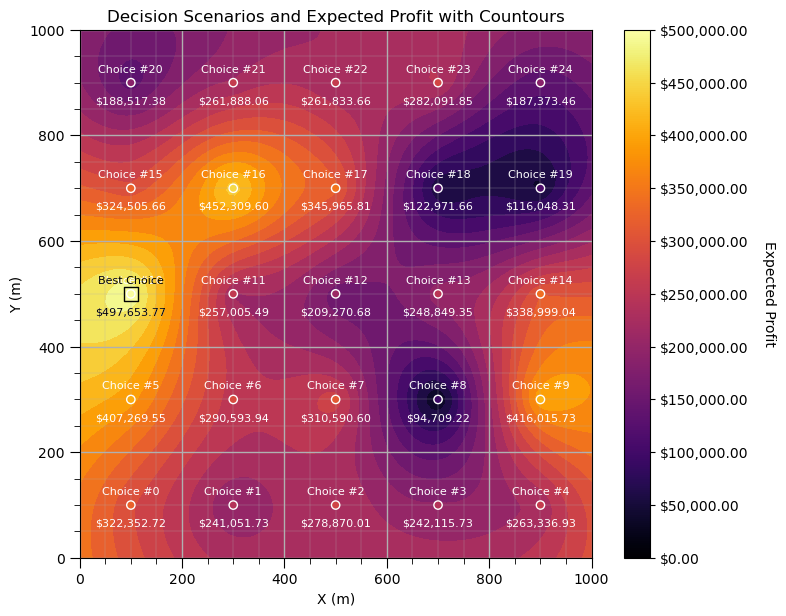

In [8]:
s_best = np.argmax(expected_profit)

plt.subplot(111)
plt.title("Decision Scenarios and Expected Profit with Countours")
sc = plt.scatter(scenarios[:,1],scenarios[:,0],c=expected_profit,edgecolor = 'white',cmap=cmap,vmin = 0, vmax = 500000,zorder=100)
for s in range(0,S):
    plt.annotate('Choice #' + str(s),[scenarios[s,1],scenarios[s,0]+20],color= 'white',ha = 'center',fontsize=8,zorder=100)
    label = f"${np.round(expected_profit[s],2):,.2f}"
    plt.annotate(str(label),[scenarios[s,1],scenarios[s,0]-40],color= 'white',ha = 'center',fontsize=8,zorder=100)
plt.scatter(scenarios[s_best,1],scenarios[s_best,0],c=expected_profit[s_best],s = 100,marker='s',
            edgecolor = 'black',cmap=cmap,vmin = 0, vmax = 500000,zorder=50)
plt.annotate('Best Choice',[scenarios[s_best,1],scenarios[s_best,0]+20],color= 'black',ha = 'center',fontsize=8,zorder=200)
label = f"${np.round(expected_profit[s_best],2):,.2f}"
plt.annotate(str(label),[scenarios[s_best,1],scenarios[s_best,0]-40],color= 'black',ha = 'center',fontsize=8,zorder=200)

cbar = plt.colorbar(sc,orientation="vertical", ticks=np.linspace(0, 500000, 11)); plt.tight_layout()
formatter = FuncFormatter(lambda x, pos: f"${x:,.2f}")
cbar.set_label('Expected Profit', rotation=270, labelpad=20)
cbar.set_ticks(cbar.get_ticks())  # Ensure ticks are set
cbar.ax.yaxis.set_major_formatter(formatter)
x_grid = np.linspace(xmin, xmax, 100)  # Higher resolution grid between xmin and xmax
y_grid = np.linspace(ymin, ymax, 100)  # Higher resolution grid between ymin and ymax
X, Y = np.meshgrid(x_grid, y_grid)

rbf = Rbf(xv.flatten(), yv.flatten(), expected_profit, function='linear')  # or 'multiquadric', 'thin_plate', etc.
Z = rbf(X, Y)  # works on full grid

plt.contourf(X, Y, Z, levels=20, cmap=cmap,zorder=0)

#contour = plt.contour(X, Y, Z_smooth, 10, cmap=cmap, alpha=0.7)
plt.xlabel('X (m)'); plt.ylabel('Y (m)')
plt.xlim([xmin,xmax]); plt.ylim([ymin,ymax]); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.05, hspace=0.2); plt.show()  

#### Optimum Estimate with a Loss Function Example

Let's start by parameterizing and plotting our loss function.

* I designed a function similar to the illustrations above for loss due to over- or underestimation of hydrocarbon resources in millions of barrels.

* for convenience, I made a function for my loss function, i.e., a loss function, function.   

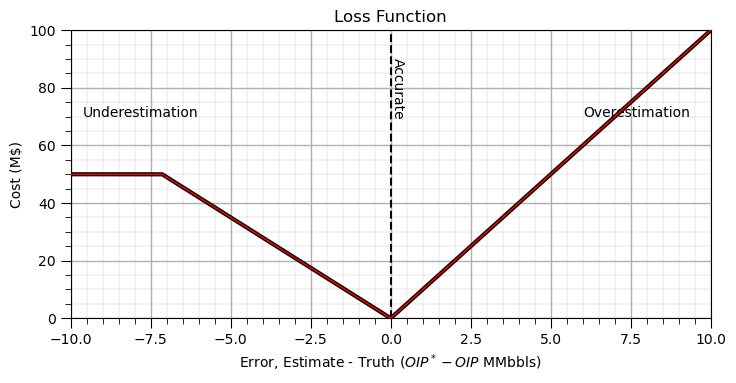

In [9]:
m_over = 10.0; m_under = 7.0; max_under = 50.0

delta_values = np.arange(-10.0,10.0,0.02)

def loss_function(error,m_under,max_under,m_over):
    loss = np.where(error < 0.0, np.clip(-1*error * m_under,a_min= None,a_max = max_under),error * m_over)
    return loss

loss_plot = loss_function(delta_values,m_under,max_under,m_over)

plt.plot(delta_values,loss_plot,c='black',lw=3,zorder=1); plt.plot(delta_values,loss_plot,c='red',lw=1,zorder=10)
plt.plot([0,0],[0,100],color='black',ls='--'); plt.annotate('Accurate',[0,70],rotation=270)
plt.annotate('Underestimation',[-6,70], rotation=0,horizontalalignment='right')
plt.annotate('Overestimation',[6,70], rotation=0,horizontalalignment='left')

plt.xlim([-10,10]); plt.ylim([0,100]); add_grid2(); plt.title('Loss Function'); plt.ylabel('Cost (M$)') 
plt.xlabel(r'Error, Estimate - Truth ($OIP^*-OIP$ MMbbls)')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.6, wspace=0.05, hspace=0.2); plt.show()  

##### Distribution of Uncertainty

Let's assume a parametric uncertainty distribution for resources that we can easily modify to try out some different cases.

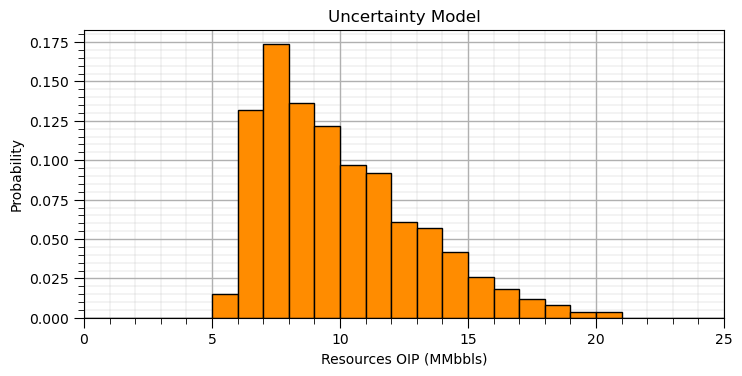

In [10]:
alpha = 1.5; beta = 7.0                               # parameters of the beta distribution
mean = 10.0; stdev = 3.0

uncertainty_samples = np.random.beta(a= alpha, b = beta, size = 1000)
uncertainty_samples = GSLIB.affine(uncertainty_samples, mean, stdev)

prob,bin_edges, _ = plt.hist(uncertainty_samples,color='darkorange',edgecolor='black',bins = np.linspace(0,25,26),density = True); add_grid2()
bin_centroids = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.xlim([0,25]); plt.xlabel('Resources OIP (MMbbls)'); plt.ylabel('Probability'); plt.title('Uncertainty Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.6, wspace=0.05, hspace=0.2); plt.show()  

#### Calculate Expected Loss for an Estimate

Now, let's select a single estimate and calculate the expected loss.

* we repeat the calculation for a range of estimates to also visualize the expected loss vs. estimate curve.

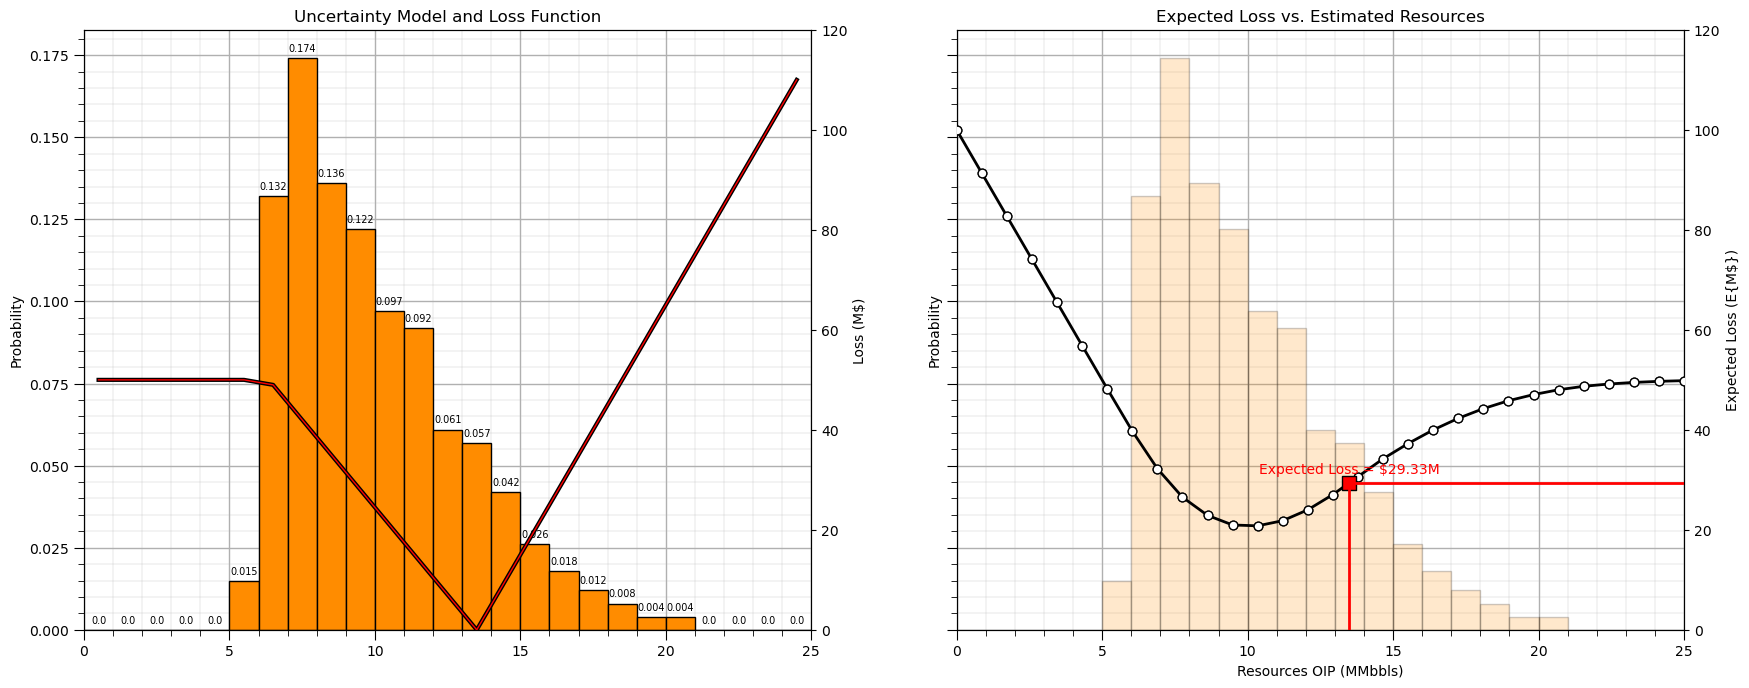

In [11]:
estimate = 13.5

fig, axs = plt.subplots(1, 2, figsize=(8, 6),sharey = True)
ax1 = axs[0]; ax2 = axs[1]
prob,bin_edges, _ = ax1.hist(uncertainty_samples,color='darkorange',edgecolor='black',bins = np.linspace(0,25,26),density = True);
add_grid(ax1)
bin_centroids = (bin_edges[:-1] + bin_edges[1:]) / 2

error = bin_centroids - estimate
loss_plot_est = loss_function(error,m_under,max_under,m_over)

#ax1.plot([estimate,estimate],[0,0.25],color='black',ls='--'); ax1.annotate('Accurate',[0,70],rotation=270)

ax1b = ax1.twinx()
ax1b.plot(bin_centroids,loss_plot_est,c='black',lw=3,zorder=1); ax1b.plot(bin_centroids,loss_plot_est,c='red',lw=1,zorder=10)
ax1b.set_ylim([0.,120.]); add_grid(ax2)
plt.xlim([0,25]); plt.xlabel('Resources OIP (MMbbls)'); ax1.set_ylabel('Probability'); plt.title('Uncertainty Model and Loss Function') 
ax1b.set_ylabel('Loss (M$)')

for ibin,bincenter in enumerate(bin_centroids):
    ax1.annotate(np.round(prob[ibin],3),[bincenter,prob[ibin]+0.002], ha='center',size=7)

ax2.hist(uncertainty_samples,color='darkorange',edgecolor='black',bins = np.linspace(0,25,26),density = True,alpha=0.2);
ax2b = ax2.twinx()
expected_loss = np.dot(loss_plot_est,prob)
ax2b.scatter(estimate,expected_loss,marker='s',s=100,color='red',edgecolor='black',zorder=20)
ax2b.annotate('Expected Loss = $' + str(np.round(expected_loss,2)) + 'M',[estimate,expected_loss+2],ha='center',color='red',zorder=20)
ax2b.plot([estimate,estimate],[0,expected_loss],color='red',lw=2,zorder=30)
ax2b.plot([estimate,25],[expected_loss,expected_loss],color='red',lw=2,zorder=30)
ax2b.set_ylabel('Expected Loss (E{M$})'); ax2b.set_ylim([0,120]); ax2.set_ylabel('Probability')

est_mat = np.linspace(0,25,30)
exp_loss = np.zeros(len(est_mat))
for iest, est in enumerate(est_mat):
    error = bin_centroids - est
    loss_plot_est_curve = loss_function(error,m_under,max_under,m_over)  
    exp_loss[iest] = np.dot(loss_plot_est_curve,prob)

ax2b.scatter(est_mat,exp_loss,c='white',edgecolor='black',marker='o',s=40,zorder=10)
ax2b.plot(est_mat,exp_loss,c='black',marker='o',lw=2,zorder=1)
ax2.set_xlim([0,25]); ax2.set_xlabel('Resources OIP (MMbbls)'); ax2.set_title('Expected Loss vs. Estimated Resources')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()  

To help you understand the nuts and bolts of the expected loss calculation for the estimate above, let's make a table with,

* **truth values**: bin centroids of the histogram

* **error**: estimate - truth

* **loss**: loss function applied to the error

* **probability**: probability of truth being each outcome

* **probability times loss**: for each possible for each outcome                                                          

In [12]:
df = pd.DataFrame([bin_centroids, error, loss_plot_est, prob*100,prob*loss_plot_est], index=['Truth', 'Error', 'Loss', 'Prob','Prob x Loss']).round(1)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Truth,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,...,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5
Error,-24.5,-23.5,-22.5,-21.5,-20.5,-19.5,-18.5,-17.5,-16.5,-15.5,...,-9.5,-8.5,-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5
Loss,50.0,50.0,50.0,50.0,50.0,50.0,49.0,42.0,35.0,28.0,...,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0
Prob,0.0,0.0,0.0,0.0,0.0,1.5,13.2,17.4,13.6,12.2,...,2.6,1.8,1.2,0.8,0.4,0.4,0.0,0.0,0.0,0.0
Prob x Loss,0.0,0.0,0.0,0.0,0.0,0.8,6.5,7.3,4.8,3.4,...,0.5,0.5,0.5,0.4,0.2,0.3,0.0,0.0,0.0,0.0


Now to calculate the expected loss for our estimate, we sum the 'Prob x Loss' row.

In [13]:
expected_loss_demo = df.loc['Prob x Loss'].sum()
print(np.round(expected_loss_demo))

29.0


#### Minimizing the Expected Loss

Let's repeat the calculation of expected loss vs. estimate and then select the estimate that minimizes the expected loss.

* the plot above included additional information for illustration, including the loss function positioned to calculate the expected loss of a specific estimate, so we remove that now

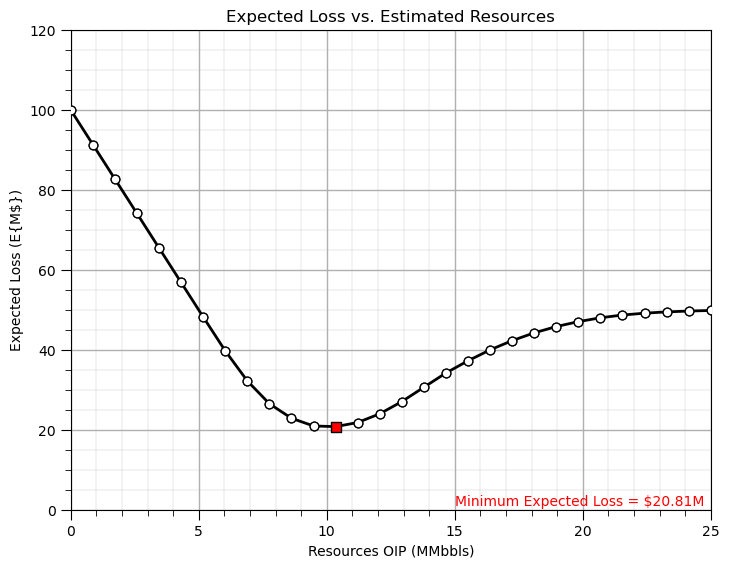

In [14]:
plt.subplot(111)
expected_loss = np.dot(loss_plot_est,prob)
plt.ylabel('Expected Loss (E{M$})'); plt.ylim([0,120]); ax2.set_ylabel('Probability')

est_mat = np.linspace(0,25,30)
exp_loss = np.zeros(len(est_mat))
for iest, est in enumerate(est_mat):
    error = bin_centroids - est
    loss_plot_est = loss_function(error,m_under,max_under,m_over)  
    exp_loss[iest] = np.dot(loss_plot_est,prob)

min_est = est_mat[np.argmin(exp_loss)]
min_est_loss = exp_loss[np.argmin(exp_loss)]

plt.annotate('Minimum Expected Loss = $' + str(np.round(min_est_loss,2)) + 'M',[15,1],ha='left',color='red',zorder=20)
plt.scatter(min_est,min_est_loss,marker='s',color='red',edgecolor='black',s=50,zorder=40)

plt.scatter(est_mat,exp_loss,c='white',edgecolor='black',marker='o',s=40,zorder=10)
plt.plot(est_mat,exp_loss,c='black',marker='o',lw=2,zorder=1)
plt.xlim([0,25]); plt.xlabel('Resources OIP (MMbbls)'); plt.title('Expected Loss vs. Estimated Resources'); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()  

#### Comments

This was a basic demonstration of optimum decision making in the precense of uncertainty. 

* we build uncertainty models all the time to support decision making. Here's how it gets done.

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling, multivariate analysis and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)